In [126]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
import skimage.io as imio
import cv2
import skimage.color as color

In [127]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.cmap'] = 'gray'

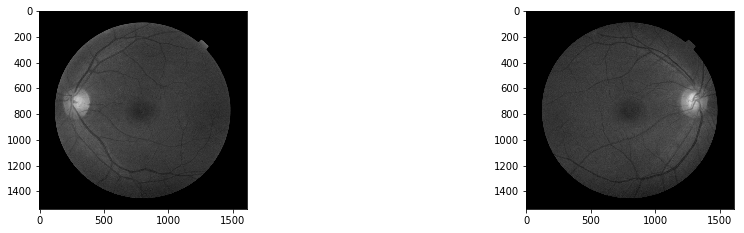

In [128]:
os.path.exists('patient#1')
for i in range(1, 50):
    folder = 'patient#' + str(i)
    if os.path.exists(folder):
        left_image = imio.imread(folder + '/' + str(i) + '_left.jpg')
        left_image = color.rgb2gray(left_image)
        right_image = imio.imread(folder + '/' + str(i) + '_right.jpg')
        right_image = color.rgb2gray(right_image)        

plt.subplot(2, 2, 1)
plt.imshow(left_image)
plt.subplot(2, 2, 2)
plt.imshow(right_image)


In [180]:
def update_progress(progress, barLength = 100):
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    if progress == 1:
        text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    else:
        text = "\rPercent: [{0}] {1:0.2f}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [185]:
def remove_smooth_edges(image, patch_size = 100):
    pixel_combinations = []
    train_possibles = [0, 0, 0, 0, 0, 0]
    for row in range(image.shape[0] - 2*patch_size):
        for col in range(image.shape[1] - 2*patch_size):
            patch_1 = image[row + patch_size : row + 2*patch_size, col + patch_size : col + 2*patch_size]
            for row_2 in range(2*patch_size):
                for col_2 in range(2*patch_size):
                    patch_2 = image[row + row_2 : row + row_2 + patch_size, col + col_2 : col+ col_2 + patch_size]
                    if not(np.all(patch_2) and np.all(patch_1)):
                        shift_magnitude = np.sqrt((row_2 - patch_size)**2 + (col_2 - patch_size)**2)
                        overlap = (2*patch_size - row_2) * (2*patch_size - col_2)
                        train_possible = [row + patch_size, col + patch_size, row + row_2, col + col_2, shift_magnitude, overlap]
                        train_possibles = np.vstack((train_possibles, train_possible))
        update_progress(row / (image.shape[0] - 2*patch_size), barLength = 50)
        try:
            print(train_possibles.shape)
        except:
            pass    
    return [image, train_possibles[1:, :]]

In [186]:
test = cv2.resize(right_image, (60, 60))
image = remove_smooth_edges(test, patch_size = 3)
image[1].shape
plt.imshow(image[1][1, :, :])

Percent: [--------------------------------------------------] 0.00% (1945, 6)
Percent: [#-------------------------------------------------] 1.85% (3808, 6)
Percent: [##------------------------------------------------] 3.70% (5644, 6)
Percent: [###-----------------------------------------------] 5.56% (7444, 6)
Percent: [####----------------------------------------------] 7.41% (9208, 6)
Percent: [#####---------------------------------------------] 9.26% (10711, 6)
Percent: [######--------------------------------------------] 11.11% (12139, 6)
Percent: [######--------------------------------------------] 12.96% (13483, 6)
Percent: [#######-------------------------------------------] 14.81% (14743, 6)
Percent: [########------------------------------------------] 16.67% (15796, 6)
Percent: [#########-----------------------------------------] 18.52% (16792, 6)
Percent: [##########----------------------------------------] 20.37% (17725, 6)
Percent: [###########------------------------------

IndexError: too many indices for array

In [116]:
np.sqrt(9)

3.0

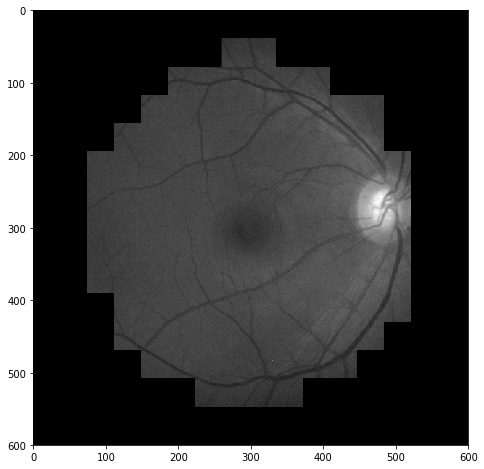

In [158]:
plt.imshow(cv2.resize(right_image, (600, 600)))